## Obsesity

About Dataset
Obesity

Obesity, which causes physical and mental problems, is a global health problem with serious consequences. The prevalence of obesity is increasing steadily, and therefore, new research is needed that examines the influencing factors of obesity and how to predict the occurrence of the condition according to these factors.

" https://www.semanticscholar.org/paper/Estimation-of-Obesity-Levels-with-a-Trained-Neural-Ya%C4%9F%C4%B1n-G%C3%BCl%C3%BC/2c1eab51db154493d225c8b86ba885bbaf147a2c "

Dataset Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

* Gender: Feature, Categorical, "Gender"
* Age : Feature, Continuous, "Age"
* Height: Feature, Continuous
* Weight: Feature Continuous
* family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

* FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
* FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
* NCP : Feature, Continuous, " How many main meals do you have daily? "
* CAEC : Feature, Categorical, " Do you eat any food between meals? "
* SMOKE : Feature, Binary, " Do you smoke? "
* CH2O: Feature, Continuous, " How much water do you drink daily? "
* SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
* FAF: Feature, Continuous, " How often do you have physical activity? "
* TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

* CALC : Feature, Categorical, " How often do you drink alcohol? "
* MTRANS : Feature, Categorical, " Which transportation do you usually use? "
* NObeyesdad : Target, Categorical, "Obesity level"

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

### Load Data

In [2]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


### View Data

In [3]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [56]:
data['TUE'].min()

0.0

In [4]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

* There's no null value in the dataset

In [6]:
data[data.describe().columns].corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


* Since the data is clean and tidy there's no need for data cleaning we will be moving straight to data visualization

## Data Viz

In [7]:
data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### Univariate Plots

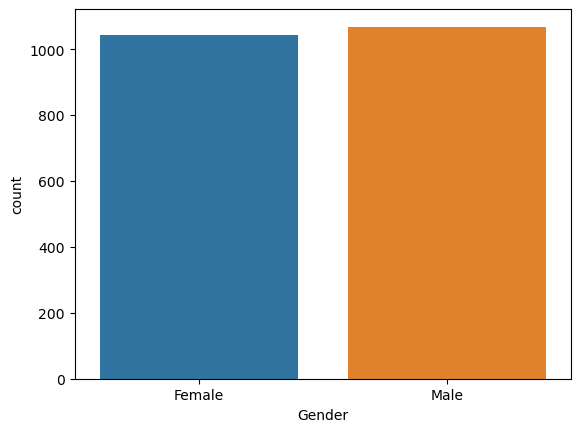

In [8]:
sns.countplot(data,x='Gender')
plt.show()

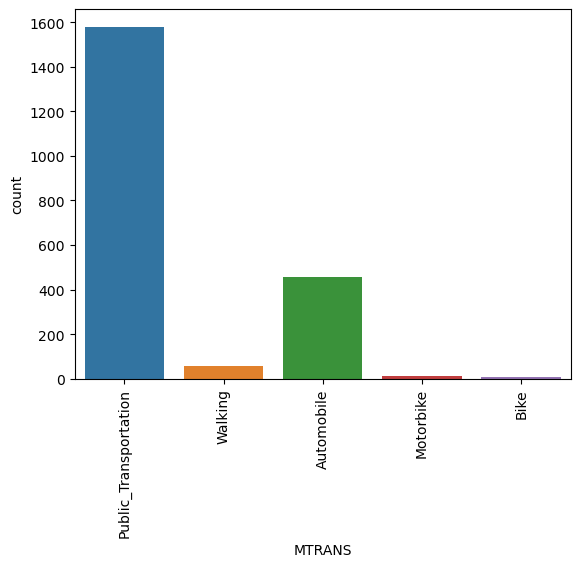

In [9]:
sns.countplot(data,x='MTRANS')
plt.xticks(rotation=90)
plt.show()


* Data is evenly distributed between male and female

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


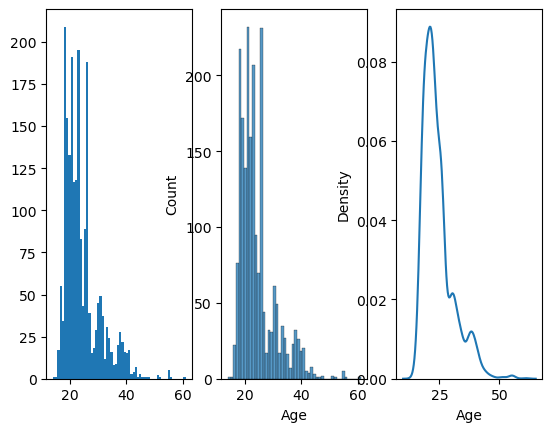

In [10]:
#AGE
fig, axes = plt.subplots(1,3)

axes[0].hist(data.Age,bins=60)


sns.histplot(data, x='Age', ax = axes[1])


sns.kdeplot(data, x='Age',  ax = axes[2])
plt.show()






C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


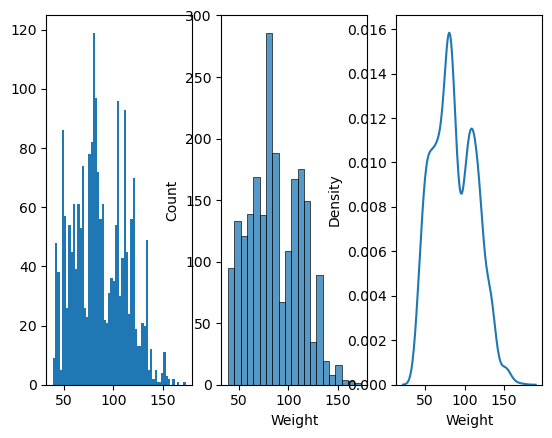

In [11]:
fig, axes = plt.subplots(1,3)

axes[0].hist(data.Weight,bins=60)


sns.histplot(data, x='Weight', ax = axes[1])

sns.kdeplot(data, x='Weight',  ax = axes[2])
plt.show()



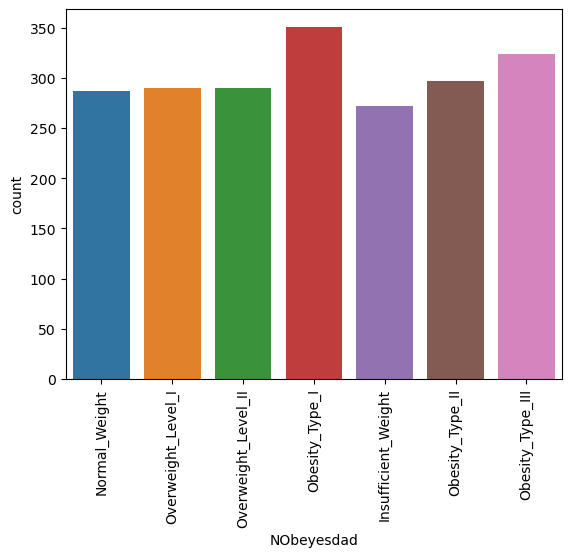

In [12]:

sns.countplot(data,x='NObeyesdad')
plt.xticks(rotation=90)

plt.show()

### Bivariate Analysis

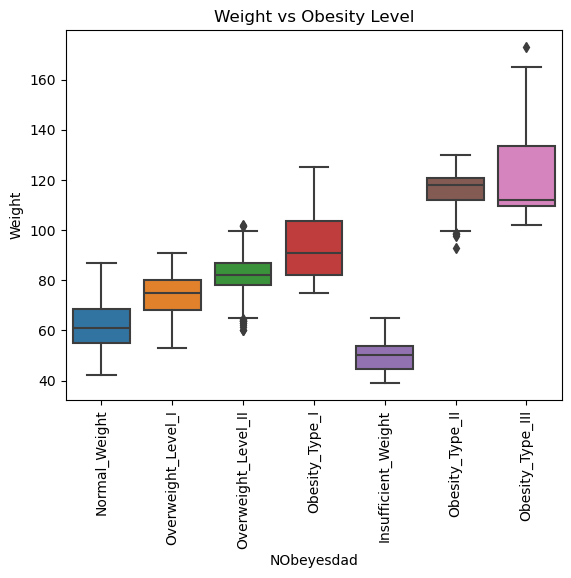

In [13]:
sns.boxplot(data=data,y='Weight',x='NObeyesdad')
plt.xticks(rotation=90)
plt.title('Weight vs Obesity Level')
plt.show()

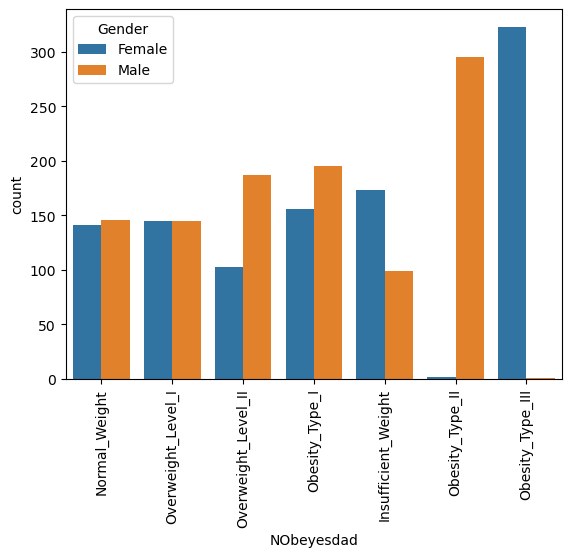

In [14]:
fig,axe = plt.subplots=(1,2)

sns.countplot(data,x='NObeyesdad',hue='Gender')
plt.xticks(rotation=90)
plt.show()



### MultiVariate Analysis

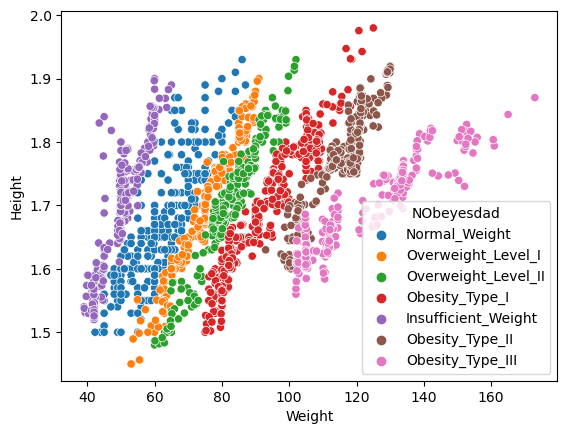

In [15]:
sns.scatterplot(data, x='Weight', y='Height', hue='NObeyesdad')
plt.show()


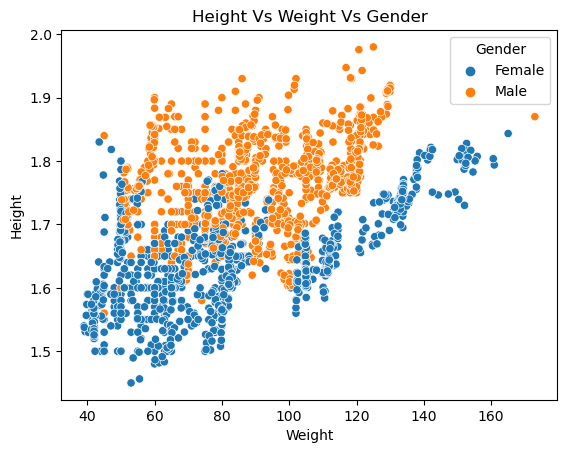

In [16]:
sns.scatterplot(data, x='Weight', y='Height', hue='Gender')
plt.title('Height Vs Weight Vs Gender')
plt.show()


### Label Encoding

In [17]:
#Get Categorical columns
categorical_columns = [col for col in list(data.columns) if col not in data.describe().columns]
print(categorical_columns)

['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [18]:
#Get Columns with just 2 unique values
categorical_columns_2_variables = []
categorical_variables_3ormore =[]
for col in categorical_columns:
    if len(data[col].unique()) == 2:
        categorical_columns_2_variables.append(col)
    else:
        categorical_variables_3ormore.append(col)



In [19]:
print(categorical_columns_2_variables)
print(categorical_variables_3ormore)

['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']
['CALC', 'CAEC', 'MTRANS', 'NObeyesdad']


In [20]:
'''
    Tranform the columns with two variables to dummy variables 
    And drop first to retain one column
    Yes = 1
    No = 0
    Male = 1
    Female = 0
'''

for column in categorical_columns_2_variables:
    data[column] = pd.get_dummies(data[column], drop_first=True, dtype=int)

In [21]:
data.head() 

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,no,0,2.0,3.0,0,0,2.0,1,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,0,1.52,56.0,Sometimes,0,3.0,3.0,1,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,1,1.80,77.0,Frequently,0,2.0,3.0,0,0,2.0,1,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,1,1.80,87.0,Frequently,0,3.0,3.0,0,0,2.0,0,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,1,1.78,89.8,Sometimes,0,2.0,1.0,0,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
encoding_dict = {}

for column in categorical_columns_2_variables:
    if column != 'Gender':
        encoding_dict[column] = {'Yes':1,'No':0}
    else:
        encoding_dict[column] = {'Male':1,'Female':0}

print(encoding_dict)

{'Gender': {'Male': 1, 'Female': 0}, 'FAVC': {'Yes': 1, 'No': 0}, 'SCC': {'Yes': 1, 'No': 0}, 'SMOKE': {'Yes': 1, 'No': 0}, 'family_history_with_overweight': {'Yes': 1, 'No': 0}}


In [23]:
# Encoding Variables with multiple values

le = LabelEncoder()

for column in categorical_variables_3ormore:
    encoded = le.fit_transform(data[column])
    data.drop(column, axis=1, inplace=True)
    data[column] = encoded
    feature_dict = dict(zip(le.classes_,range(len(le.classes_))))
    encoding_dict[column] = feature_dict

In [24]:
print(encoding_dict)

{'Gender': {'Male': 1, 'Female': 0}, 'FAVC': {'Yes': 1, 'No': 0}, 'SCC': {'Yes': 1, 'No': 0}, 'SMOKE': {'Yes': 1, 'No': 0}, 'family_history_with_overweight': {'Yes': 1, 'No': 0}, 'CALC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}, 'MTRANS': {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}, 'NObeyesdad': {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}}


In [25]:
data.head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CALC,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,3,2,3,1
1,21.0,0,1.52,56.0,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,2,3,1
2,23.0,1,1.80,77.0,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1,2,3,1
3,27.0,1,1.80,87.0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,2,4,5
4,22.0,1,1.78,89.8,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,2,3,6


In [26]:
data.NObeyesdad.value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [27]:
data.corr()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CALC,CAEC,MTRANS,NObeyesdad
Age,1.000000,0.048394,-0.025958,0.202560,0.063902,0.016291,-0.043944,-0.116283,0.091987,-0.045304,0.205725,-0.144938,-0.296931,-0.044487,0.083739,-0.601945,0.236170
Gender,0.048394,1.000000,0.618466,0.161668,0.064934,-0.274505,0.067600,-0.102633,0.044698,0.107930,0.102512,0.189607,0.017269,0.007616,0.091543,-0.137537,0.024908
Height,-0.025958,0.618466,1.000000,0.463136,0.178364,-0.038121,0.243672,-0.133753,0.055499,0.213376,0.247684,0.294709,0.051912,-0.129732,0.048818,-0.073609,0.038986
Weight,0.202560,0.161668,0.463136,1.000000,0.272300,0.216125,0.107469,-0.201906,0.025746,0.200575,0.496820,-0.051436,-0.071561,-0.206677,0.287493,0.004610,0.387643
FAVC,0.063902,0.064934,0.178364,0.272300,1.000000,-0.027283,-0.007000,-0.190658,-0.050660,0.009719,0.208036,-0.107995,0.068417,-0.089520,0.150068,-0.069800,0.044582
FCVC,0.016291,-0.274505,-0.038121,0.216125,-0.027283,1.000000,0.042216,0.071852,0.014320,0.068461,0.040372,0.019939,-0.101135,-0.060781,-0.054670,0.064743,0.018522
NCP,-0.043944,0.067600,0.243672,0.107469,-0.007000,0.042216,1.000000,-0.015624,0.007811,0.057088,0.071370,0.129504,0.036326,-0.071747,-0.097801,-0.053858,-0.092616
SCC,-0.116283,-0.102633,-0.133753,-0.201906,-0.190658,0.071852,-0.015624,1.000000,0.047731,0.008036,-0.185422,0.074221,-0.010928,-0.003463,-0.109179,0.043157,-0.050679
SMOKE,0.091987,0.044698,0.055499,0.025746,-0.050660,0.014320,0.007811,0.047731,1.000000,-0.031995,0.017385,0.011216,0.017613,-0.082471,-0.055282,-0.010702,-0.023256
CH2O,-0.045304,0.107930,0.213376,0.200575,0.009719,0.068461,0.057088,0.008036,-0.031995,1.000000,0.147437,0.167236,0.011965,-0.091386,0.144995,0.044028,0.108868


In [28]:
data.head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CALC,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,3,2,3,1
1,21.0,0,1.52,56.0,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,2,3,1
2,23.0,1,1.80,77.0,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1,2,3,1
3,27.0,1,1.80,87.0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,2,4,5
4,22.0,1,1.78,89.8,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,2,3,6


In [29]:
dat =data.reset_index(drop=True)
#dat= pd.reset_index(data)

In [30]:
dat.head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CALC,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,3,2,3,1
1,21.0,0,1.52,56.0,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,2,3,1
2,23.0,1,1.80,77.0,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1,2,3,1
3,27.0,1,1.80,87.0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,2,4,5
4,22.0,1,1.78,89.8,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,2,3,6


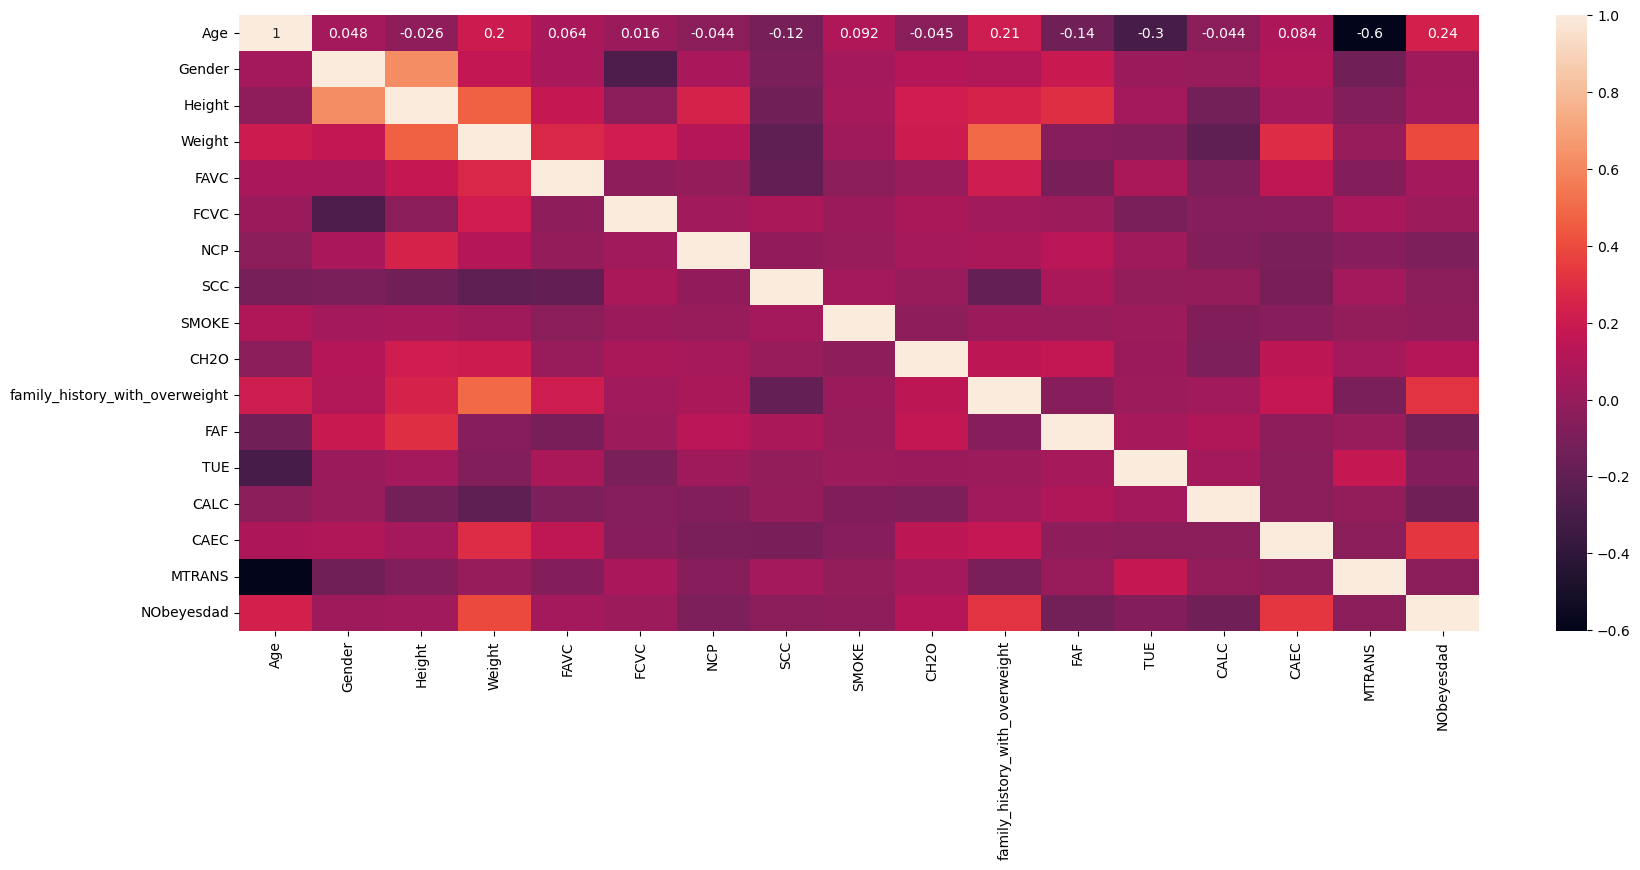

In [31]:
plt.figure(figsize=(20,8))
sns.heatmap(dat.corr(),annot=True)
plt.show()

### Model Building

In [32]:
### Split data

target = data.NObeyesdad
features = data.drop('NObeyesdad', axis = 1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train,X_test,y_train,y_test = train_test_split(scaled_features,target,test_size=0.25,random_state=42)

In [33]:
scaled_features[2]

array([-0.20688898,  0.98822657,  1.05402854, -0.36609013, -2.75976929,
       -0.7850187 ,  0.40415272, -0.21827203, -0.14590027, -0.01307326,
        0.47229133,  1.16382038,  0.56199675, -2.46149063,  0.30034556,
        0.50333674])

In [34]:
## Logistic Regression Model

logisticregresssionmodel = LogisticRegression()
logisticregresssionmodel.fit(X_train,y_train)

## Predictions For Random Forest
logisticregresssionmodel_predictions = logisticregresssionmodel.predict(X_test)

## classification report

print(classification_report(logisticregresssionmodel_predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89        83
           1       0.58      0.85      0.69        53
           2       0.90      0.96      0.93        89
           3       0.99      0.89      0.94        83
           4       0.99      1.00      0.99        78
           5       0.75      0.73      0.74        73
           6       0.84      0.77      0.80        69

    accuracy                           0.86       528
   macro avg       0.86      0.86      0.85       528
weighted avg       0.88      0.86      0.87       528



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
## RandomForestClassifier Model

randomForestmodel = RandomForestClassifier()
randomForestmodel.fit(X_train,y_train)

## Predictions For Random Forest
randomForestmodel_predictions = randomForestmodel.predict(X_test)

## classification report

print(classification_report(randomForestmodel_predictions,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        66
           1       0.91      0.85      0.88        84
           2       0.96      0.99      0.97        91
           3       0.99      0.95      0.97        78
           4       0.99      1.00      0.99        78
           5       0.85      0.88      0.86        68
           6       0.94      0.94      0.94        63

    accuracy                           0.94       528
   macro avg       0.94      0.94      0.94       528
weighted avg       0.94      0.94      0.94       528



In [36]:
## GradientBoostingClassifier Model

gradientBoostingmodel = GradientBoostingClassifier()
gradientBoostingmodel.fit(X_train,y_train)

## Predictions For Gradient Boost
gradientBoostingmodel_predictions = gradientBoostingmodel.predict(X_test)

## classification report

print(classification_report(gradientBoostingmodel_predictions,y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.85      0.93      0.89        71
           2       0.91      0.96      0.93        90
           3       0.99      0.93      0.95        80
           4       0.99      1.00      0.99        78
           5       0.94      0.88      0.91        76
           6       0.95      0.97      0.96        62

    accuracy                           0.94       528
   macro avg       0.94      0.94      0.94       528
weighted avg       0.94      0.94      0.94       528



### Save Pickle Files 


In [37]:
import pickle

In [39]:
with open ('gradientboosting.pkl','wb') as f:
    pickle.dump(gradientBoostingmodel,f)

with open ('scaler.pkl','wb') as y:
    pickle.dump(scaler,y)

with open ('encoding_dict.pkl','wb') as z:
    pickle.dump(encoding_dict,z)

In [40]:
encoding_dict

{'Gender': {'Male': 1, 'Female': 0},
 'FAVC': {'Yes': 1, 'No': 0},
 'SCC': {'Yes': 1, 'No': 0},
 'SMOKE': {'Yes': 1, 'No': 0},
 'family_history_with_overweight': {'Yes': 1, 'No': 0},
 'CALC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3},
 'CAEC': {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3},
 'MTRANS': {'Automobile': 0,
  'Bike': 1,
  'Motorbike': 2,
  'Public_Transportation': 3,
  'Walking': 4},
 'NObeyesdad': {'Insufficient_Weight': 0,
  'Normal_Weight': 1,
  'Obesity_Type_I': 2,
  'Obesity_Type_II': 3,
  'Obesity_Type_III': 4,
  'Overweight_Level_I': 5,
  'Overweight_Level_II': 6}}

In [57]:
features.head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CALC,CAEC,MTRANS
0,21.0,0,1.62,64.0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,3,2,3
1,21.0,0,1.52,56.0,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,2,3
2,23.0,1,1.80,77.0,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1,2,3
3,27.0,1,1.80,87.0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,2,4
4,22.0,1,1.78,89.8,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,2,3


In [95]:
encoding_dict['NObeyesdad']

dict_items([('Insufficient_Weight', 0), ('Normal_Weight', 1), ('Obesity_Type_I', 2), ('Obesity_Type_II', 3), ('Obesity_Type_III', 4), ('Overweight_Level_I', 5), ('Overweight_Level_II', 6)])

In [91]:
da = [19, 1, 1.5, 20, 1, 3, 2, 1, 0, 4, 0, 1, 1, 2, 2,3]

da = np.array(da).reshape(1,-1)
da = scaler.transform(da)
print(da)

gradientBoostingmodel.predict(da)

[[-0.83735979  0.98822657 -2.16200126 -2.54291162  0.36234913  1.08834176
  -0.88143501  4.581439   -0.14590027  3.25059035 -2.11733722 -0.01210937
   0.56199675 -0.52115952  0.30034556  0.50333674]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])